In [3]:
import numpy as np
import pandas as pd

In [1]:
# Run the Processing_Data Notebook
%run ./Processing_Data.ipynb

./Processing_Data.ipynb:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  {
./Processing_Data.ipynb:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  "cell_type": "code",


In [18]:
%load_ext rpy2.ipython

# Load Data

In [4]:
hockey = pd.read_csv("data/clean/train.csv"
                     , sep = ',',encoding = "ISO-8859-1",engine='python')
hockey['Age'] = 117 - pd.to_numeric(hockey['Born'].str[0:2])

## Combine the train and test data together for EDA

In [5]:
train = pd.read_csv("data/clean/train.csv"
                     , sep = ',',encoding = "ISO-8859-1",engine='python')

test = pd.read_csv("data/clean/test.csv"
                     , sep = ',',encoding = "ISO-8859-1",engine='python')

test_y = pd.read_csv('data/clean/test_salaries.csv',
                     sep = ',',encoding = "ISO-8859-1",engine='python')
                     
def combine_train_and_test(train_df, test_df, test_response):
    test_df = pd.concat([test_df, test_response], axis = 1)
    return pd.concat([train_df, test_df],ignore_index = True, sort = False)

hockey = combine_train_and_test(train, test, test_y)

## How large is our dataset?

In [8]:
hockey.shape

(874, 154)

<span style='font-size:18px'> 
    Our data contains 874 observations with 154 possible features to be included into a model.<br>
    In order to use the features, we should have an understanding of which features contain missing<br>
    values, and which features do not contain any missing values.
</span>

### Columns with more than one missing value

In [28]:
missing = np.sum(hockey.isna())
missing_df = pd.DataFrame()
missing_df['Column'] = hockey.columns[missing > 0]
missing_df['Num Missing'] = missing[missing > 0].values
missing_df.sort_values('Num Missing', ascending=False).head(15)

,Column,Num Missing
0,Pr/St,225
2,DftRd,125
3,Ovrl,125
1,DftYr,125
21,sDist.1,25
13,iCF,11
24,iHA,11
18,iRB,11
15,iSF,11
14,iFF,11


# Distribution of Target Column

<span style='font-size:18px'> 
    Since we are trying to predict the salary of an NHL player, it might be useful for us to visualize<br>
    the distribution of the salary of players.
</span>

First verify that we have no missing values in our target column:

In [33]:
sum(hockey.Salary.isna())

0

In [37]:
unique, counts = np.unique(hockey.Nat, return_counts=True)
dict(zip(unique, counts))

{'AUT': 3,
 'CAN': 409,
 'CHE': 13,
 'CZE': 30,
 'DEU': 5,
 'DNK': 9,
 'FIN': 32,
 'FRA': 4,
 'GBR': 1,
 'HRV': 1,
 'LVA': 1,
 'NOR': 2,
 'RUS': 36,
 'SVK': 11,
 'SVN': 1,
 'SWE': 77,
 'USA': 239}

## Is there a salary difference for players who are undrafted vs. those who were drafted?

In [3]:
# Adding a column for whether or not the player is undrafted.
hockey = addIsNACol(hockey, 'DftYr')

In [29]:
drafted = hockey.loc[(hockey.DftYr_is_na == 0)][['Salary', 'DftYr_is_na']]
undrafted = hockey.loc[(hockey.DftYr_is_na == 1)][['Salary', 'DftYr_is_na']]

In [30]:
%R -i undrafted
%R -i drafted
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

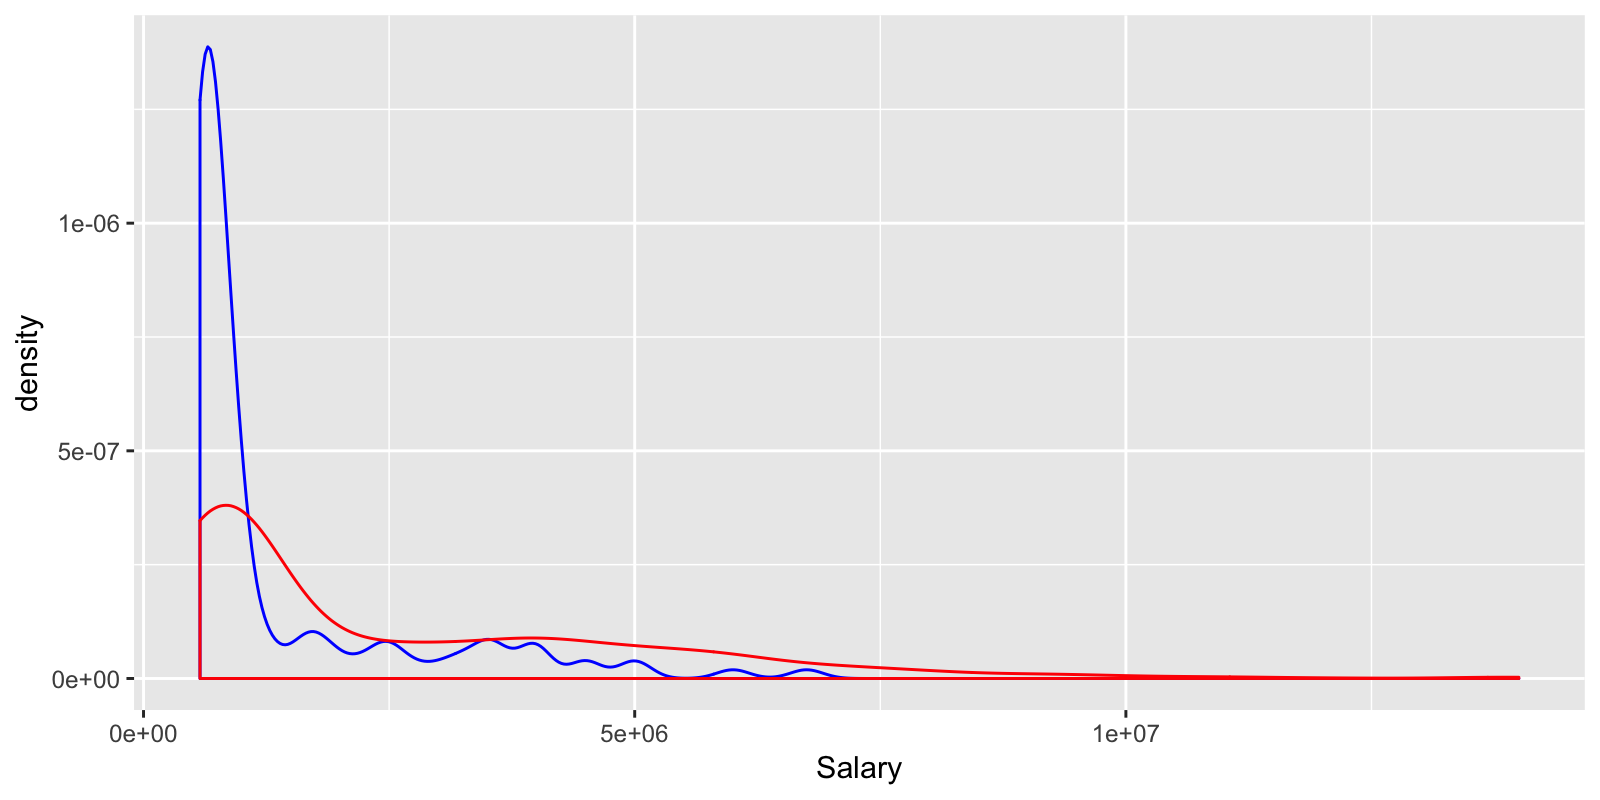

In [46]:
%%R -w 8 -h 4 --units in -r 200
ggplot() +
    geom_density(aes(x=Salary), color="Blue", data=undrafted) + 
    geom_density(aes(x=Salary), color="Red", data=drafted)

<span style='font-size:18px'> 
    From what we can see above, there doesn't appear to be much of a difference between players<br>
    salary depending on whether or not they were drafted or if they were undrafted.
</span>

# Is there a correlation between Age and Salary?

In [41]:
age = hockey[['Salary', 'Age']]
%R -i age

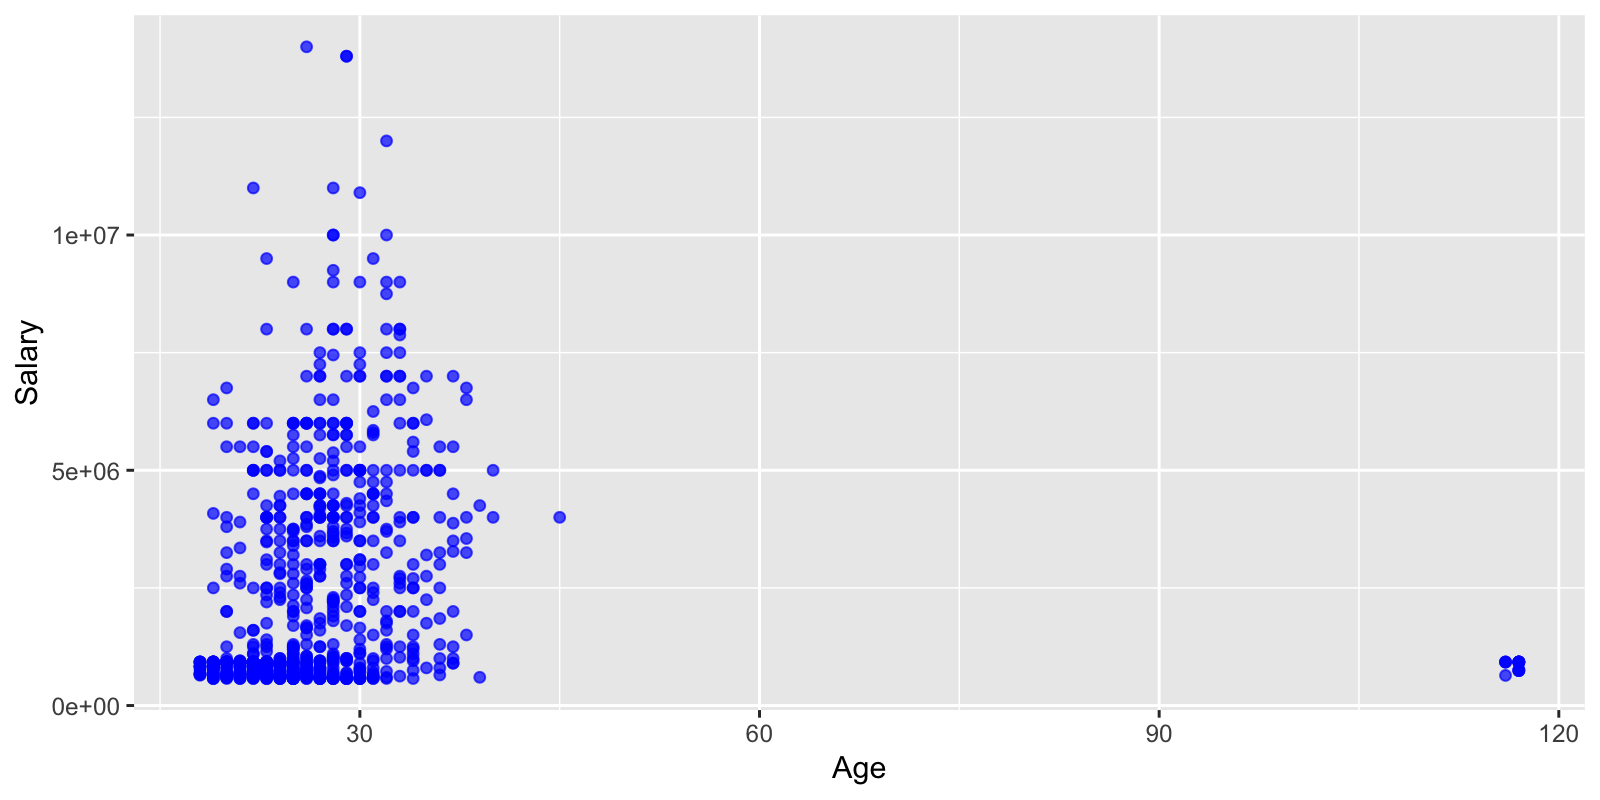

In [54]:
%%R -w 8 -h 4 --units in -r 200
ggplot() +
    geom_point(aes(x=Age, y=Salary), color='blue', alpha=0.7, data=age)